# 用户新增预测挑战赛

## 赛题主页
- https://challenge.xfyun.cn/topic/info?type=subscriber-addition-prediction&ch=ymfk4uU

In [1]:
from IPython.display import IFrame
IFrame("https://datawhaler.feishu.cn/docx/HBIHd7ugzoOsMqx0LEncR1lJnCf",
       width=900, height=400, frameborder="no", border="0")

## 跑通Baseline

### 1. 导入需要用的相关库

In [2]:
# 导入pandas库，用于数据处理和分析
import pandas as pd 
# 导入numpy库，用于科学计算和多维数组操作
import numpy as np 

# 从 sklearn.tree 模块中导入 DecisionTreeClassifier 类
from sklearn.tree import DecisionTreeClassifier 

### 2. 读取训练集和数据集并了解数据

In [3]:
train_data = pd.read_csv("./用户新增预测挑战赛公开数据/train.csv")
test_data = pd.read_csv("./用户新增预测挑战赛公开数据/test.csv")

print(train_data.head)
train_data.shape

# train_data['common_ts'] = pd.to_datetime()

<bound method NDFrame.head of           uuid  eid                          udmap      common_ts  x1  x2  x3  \
0            0   26  {"key3":"67804","key2":"650"}  1689673468244   4   0  41   
1            1   26  {"key3":"67804","key2":"484"}  1689082941469   4   0  41   
2            2    8                        unknown  1689407393040   4   0  41   
3            3   11                        unknown  1689467815688   1   3  41   
4            4   26  {"key3":"67804","key2":"650"}  1689491751442   0   3  41   
...        ...  ...                            ...            ...  ..  ..  ..   
620351  620351    2      {"key4":"14","key5":"14"}  1688990850527   4   0  41   
620352  620352    8                        unknown  1689490302305   4   0  41   
620353  620353   41    {"key1":"274","key2":"446"}  1688892078584   0   2  41   
620354  620354   26  {"key3":"67804","key2":"650"}  1689652960171   4   0  41   
620355  620355   41   {"key1":"1398","key2":"289"}  1689235398023   2   2  41  

(620356, 13)

### 3. 将'udmap'列进行 One-Hot编码

In [4]:
# - 使用One-Hot编码处理udmap列

# 将 'udmap' 列进行 One-Hot 编码 
# 数据样例：
#                    udmap  key1  key2  key3  key4  key5  key6  key7  key8  key9
# 0           {'key1': 2}     2     0     0     0     0     0     0     0     0
# 1           {'key2': 1}     0     1     0     0     0     0     0     0     0
# 2  {'key1': 3, 'key2': 2}   3     2     0     0     0     0     0     0     0

# 在 python 中, 形如 {'key1': 3, 'key2': 2} 格式的为字典类型对象, 通过key-value键值对的方式存储


# - 定义一个函数，该函数接收一个参数d
def udmap_onehot(d):
    v = np.zeros(9)     # 创建一个长度为9的全零向量
    
    if d == 'unknown':  
        return v        # 如果字典d的值 为 'unknown',则返回全零向量v
        
    d = eval(d)    # udmap实际是以字符的形式存储, 所以处理时需要先用eval 函数将'udmap' 解析为字典    
    
    for i in range(1,10):      # 遍历 'key1' 到 'key9'，注意，这里不包括10
        if 'key' + str(i) in d:  # 如果当前键存在于字典中
            v[i -1] = d['key' + str(i)] #将字典中的值存储在对应的索引值
    return v #返回向量v


In [5]:
'''
    这段代码的作用是将train_data和test_data中的'udmap'列应用udmap_onethot函数，并将结果转换为pandas.DataFrame对象。
    然后，为train_udmap_df和test_udmap_df设置列名，列名由字符串'key'加上1到9的数字组成。
'''
# 1.'udmap'列应用udmap_onethot函数
    ## np.stack() 用过垂直堆叠生成数组
train_udmap_df = pd.DataFrame(np.vstack(train_data['udmap'].apply(udmap_onehot)))


test_udmap_df = pd.DataFrame(np.vstack(test_data['udmap'].apply(udmap_onehot)))

# 2.设置列名
train_udmap_df.columns = ['key' + str(i) for i in range(1,10)] 
test_udmap_df.columns = ['key' + str(i) for i in range(1,10)]  # 设置列名

print(train_udmap_df.head)
print(test_udmap_df.head)

<bound method NDFrame.head of           key1   key2     key3  key4  key5  key6  key7  key8  key9
0          0.0  650.0  67804.0   0.0   0.0   0.0   0.0   0.0   0.0
1          0.0  484.0  67804.0   0.0   0.0   0.0   0.0   0.0   0.0
2          0.0    0.0      0.0   0.0   0.0   0.0   0.0   0.0   0.0
3          0.0    0.0      0.0   0.0   0.0   0.0   0.0   0.0   0.0
4          0.0  650.0  67804.0   0.0   0.0   0.0   0.0   0.0   0.0
...        ...    ...      ...   ...   ...   ...   ...   ...   ...
620351     0.0    0.0      0.0  14.0  14.0   0.0   0.0   0.0   0.0
620352     0.0    0.0      0.0   0.0   0.0   0.0   0.0   0.0   0.0
620353   274.0  446.0      0.0   0.0   0.0   0.0   0.0   0.0   0.0
620354     0.0  650.0  67804.0   0.0   0.0   0.0   0.0   0.0   0.0
620355  1398.0  289.0      0.0   0.0   0.0   0.0   0.0   0.0   0.0

[620356 rows x 9 columns]>
<bound method NDFrame.head of         key1   key2     key3  key4  key5  key6  key7  key8  key9
0        0.0    0.0      0.0   0.0   0.0   

- **pandas.concat()**
> 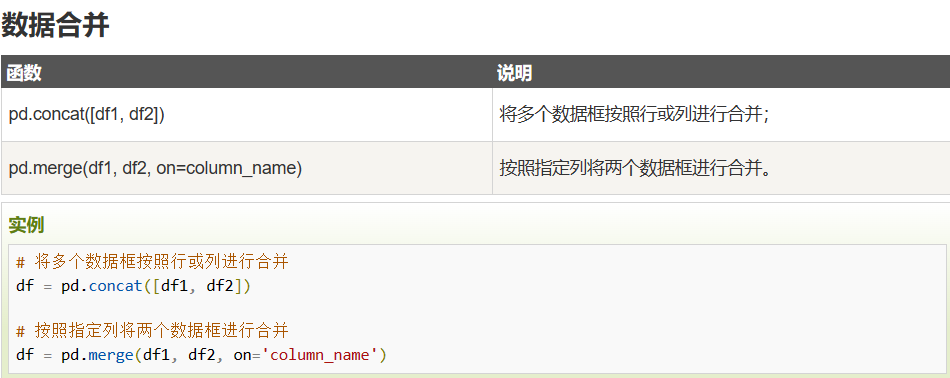)

下列代码的作用是将train_udmap_df添加到train_data和test_data中。
通过使用pd.concat函数，将train_udmap_df沿着列的方向（axis=1）与原始数据进行合并。
这样，train_data和test_data就会包含经过udmap_onethot处理后的数据    13+9=22

In [6]:
train_data = pd.concat([train_data,train_udmap_df], axis=1) 
test_data = pd.concat([test_data,train_udmap_df], axis=1)

print(train_data.head)
print(test_data.head)

<bound method NDFrame.head of           uuid  eid                          udmap      common_ts  x1  x2  x3  \
0            0   26  {"key3":"67804","key2":"650"}  1689673468244   4   0  41   
1            1   26  {"key3":"67804","key2":"484"}  1689082941469   4   0  41   
2            2    8                        unknown  1689407393040   4   0  41   
3            3   11                        unknown  1689467815688   1   3  41   
4            4   26  {"key3":"67804","key2":"650"}  1689491751442   0   3  41   
...        ...  ...                            ...            ...  ..  ..  ..   
620351  620351    2      {"key4":"14","key5":"14"}  1688990850527   4   0  41   
620352  620352    8                        unknown  1689490302305   4   0  41   
620353  620353   41    {"key1":"274","key2":"446"}  1688892078584   0   2  41   
620354  620354   26  {"key3":"67804","key2":"650"}  1689652960171   4   0  41   
620355  620355   41   {"key1":"1398","key2":"289"}  1689235398023   2   2  41  

### 4. 编码 udmap 是否为空
- 使用比较运算符将每个样本的'udmap'列与字符串'unknown'进行比较，返回一个布尔值的Series
- 使用 astype(int) 将布尔值转换成整数（0或1），以便于后续的数值计算和分析

In [7]:
train_data['udmap_isunknown'] = (train_data['udmap'] == 'unknown').astype(int)
test_data['udmap_isunknown'] = (test_data['udmap'] == 'unknown').astype(int)

print(train_data.head)
print(test_data.head)

<bound method NDFrame.head of           uuid  eid                          udmap      common_ts  x1  x2  x3  \
0            0   26  {"key3":"67804","key2":"650"}  1689673468244   4   0  41   
1            1   26  {"key3":"67804","key2":"484"}  1689082941469   4   0  41   
2            2    8                        unknown  1689407393040   4   0  41   
3            3   11                        unknown  1689467815688   1   3  41   
4            4   26  {"key3":"67804","key2":"650"}  1689491751442   0   3  41   
...        ...  ...                            ...            ...  ..  ..  ..   
620351  620351    2      {"key4":"14","key5":"14"}  1688990850527   4   0  41   
620352  620352    8                        unknown  1689490302305   4   0  41   
620353  620353   41    {"key1":"274","key2":"446"}  1688892078584   0   2  41   
620354  620354   26  {"key3":"67804","key2":"650"}  1689652960171   4   0  41   
620355  620355   41   {"key1":"1398","key2":"289"}  1689235398023   2   2  41  

- **astype():**
> 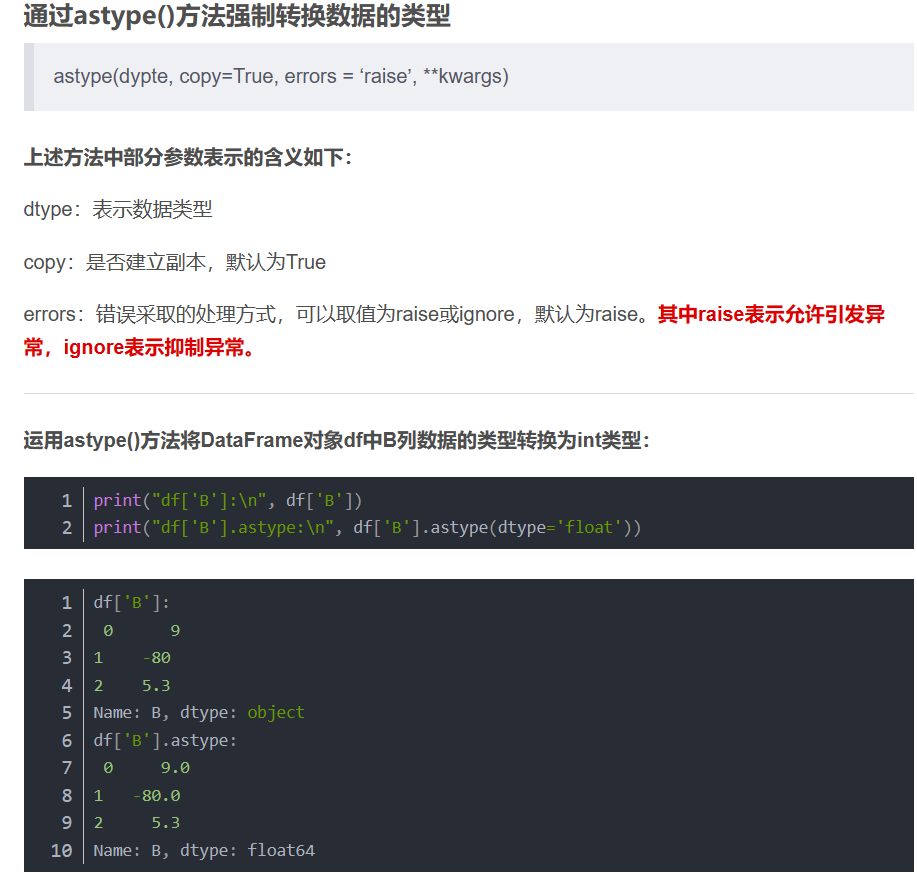

### 5. 提取 eid 的频次特征
- 使用map()将每个样本的eid映射到训练数据中eid的频次计算
- train_data['eid'].value_counts() 返回每个eid出现的频次计数

In [8]:
'''
    eid为用户行为
    这段代码的作用是为train_data和test_data添加一个名为eid_freq的新列，
    该列包含了每个eid在训练数据中出现的频率
'''

train_data['eid_freq'] = train_data['eid'].map(train_data['eid'].value_counts())
test_data['eid_freq'] = test_data['eid'].map(train_data['eid'].value_counts())

print(train_data.head)
print(test_data.head)

<bound method NDFrame.head of           uuid  eid                          udmap      common_ts  x1  x2  x3  \
0            0   26  {"key3":"67804","key2":"650"}  1689673468244   4   0  41   
1            1   26  {"key3":"67804","key2":"484"}  1689082941469   4   0  41   
2            2    8                        unknown  1689407393040   4   0  41   
3            3   11                        unknown  1689467815688   1   3  41   
4            4   26  {"key3":"67804","key2":"650"}  1689491751442   0   3  41   
...        ...  ...                            ...            ...  ..  ..  ..   
620351  620351    2      {"key4":"14","key5":"14"}  1688990850527   4   0  41   
620352  620352    8                        unknown  1689490302305   4   0  41   
620353  620353   41    {"key1":"274","key2":"446"}  1688892078584   0   2  41   
620354  620354   26  {"key3":"67804","key2":"650"}  1689652960171   4   0  41   
620355  620355   41   {"key1":"1398","key2":"289"}  1689235398023   2   2  41  

- **value_counts( )**

> 在pandas中，value_counts常用于数据表的计数及排序，它可以用来查看数据表中，指定列里有多少个**不同的数据值**，并计算每个**不同值有在该列中的个数**，同时还能根据需要进行排序。

- **map()**
> 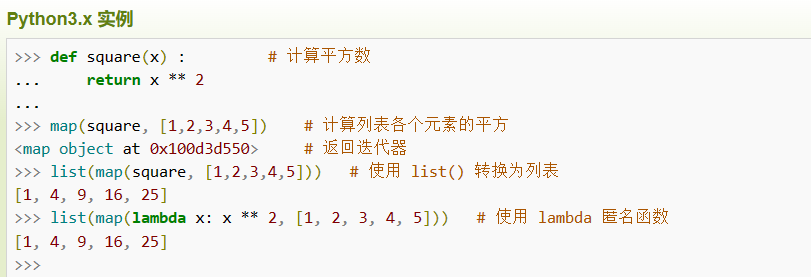

### 6. 提取eid 的标签特征
- 使用 groupby()方法按照eid进行分组，然后计算每个eid分组的目标值均值
- train_data.groupby('eid')['target'].mean() 返回每个eid分组的目标值均值

In [9]:
train_data['eid_mean'] = train_data['eid'].map(train_data.groupby('eid')['target'].mean())
test_data['eid_mean'] = test_data['eid'].map(train_data.groupby('eid')['target'].mean())

print(train_data.head)
print(test_data.head)

<bound method NDFrame.head of           uuid  eid                          udmap      common_ts  x1  x2  x3  \
0            0   26  {"key3":"67804","key2":"650"}  1689673468244   4   0  41   
1            1   26  {"key3":"67804","key2":"484"}  1689082941469   4   0  41   
2            2    8                        unknown  1689407393040   4   0  41   
3            3   11                        unknown  1689467815688   1   3  41   
4            4   26  {"key3":"67804","key2":"650"}  1689491751442   0   3  41   
...        ...  ...                            ...            ...  ..  ..  ..   
620351  620351    2      {"key4":"14","key5":"14"}  1688990850527   4   0  41   
620352  620352    8                        unknown  1689490302305   4   0  41   
620353  620353   41    {"key1":"274","key2":"446"}  1688892078584   0   2  41   
620354  620354   26  {"key3":"67804","key2":"650"}  1689652960171   4   0  41   
620355  620355   41   {"key1":"1398","key2":"289"}  1689235398023   2   2  41  

- **groupby()**
> 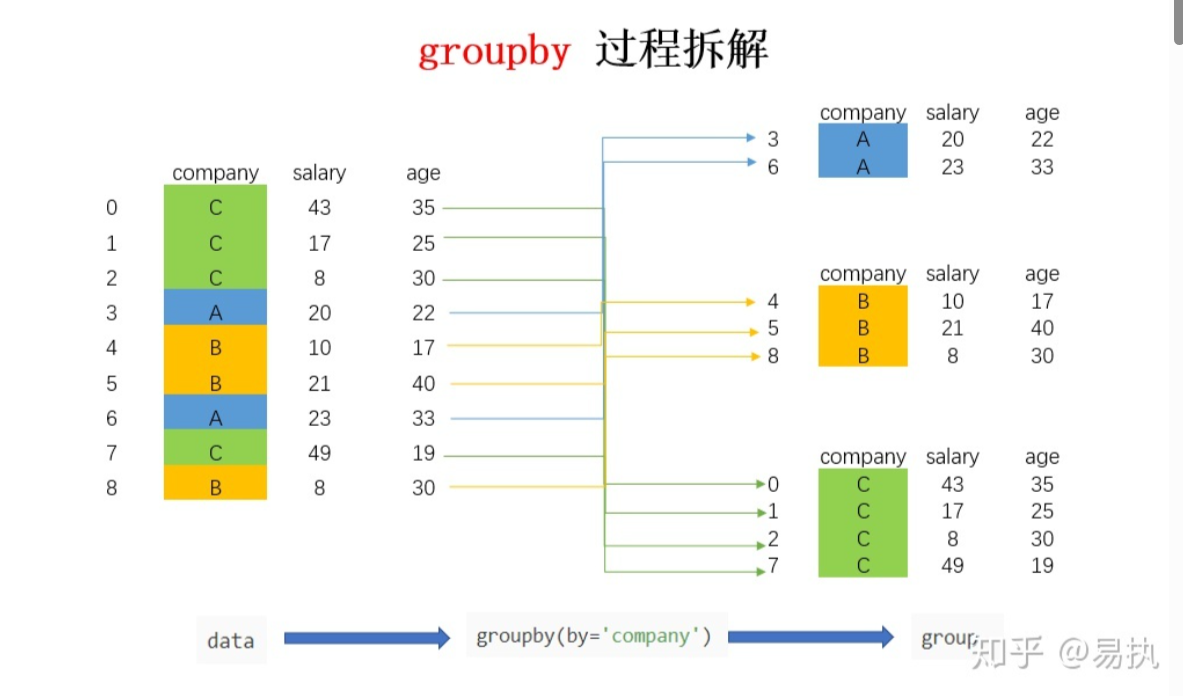

### 7. 提取时间戳
 - 使用 pd.to_datetime() 函数将时间戳列转换为 datetime 类型
 - 样例：1678932546000->2023-03-15 15:14:16
 - 注: 需要注意时间戳的长度, 如果是13位则unit 为 毫秒, 如果是10位则为 秒, 这是转时间戳时容易踩的坑

In [10]:
train_data['common_ts'] = pd.to_datetime(train_data['common_ts'], unit = 'ms')
test_data['common_ts'] = pd.to_datetime(test_data['common_ts'],unit = 'ms')
print('train_data:\n', train_data.head)
print('*'*80)
print('test_data:\n', test_data.head)

train_data:
 <bound method NDFrame.head of           uuid  eid                          udmap               common_ts  \
0            0   26  {"key3":"67804","key2":"650"} 2023-07-18 09:44:28.244   
1            1   26  {"key3":"67804","key2":"484"} 2023-07-11 13:42:21.469   
2            2    8                        unknown 2023-07-15 07:49:53.040   
3            3   11                        unknown 2023-07-16 00:36:55.688   
4            4   26  {"key3":"67804","key2":"650"} 2023-07-16 07:15:51.442   
...        ...  ...                            ...                     ...   
620351  620351    2      {"key4":"14","key5":"14"} 2023-07-10 12:07:30.527   
620352  620352    8                        unknown 2023-07-16 06:51:42.305   
620353  620353   41    {"key1":"274","key2":"446"} 2023-07-09 08:41:18.584   
620354  620354   26  {"key3":"67804","key2":"650"} 2023-07-18 04:02:40.171   
620355  620355   41   {"key1":"1398","key2":"289"} 2023-07-13 08:03:18.023   

        x1  x2  x3  

- 使用 dt.hour 属性从 datetime 列中提取小时信息，并将提取的小时信息存储在新的列 'common_ts_hour'

In [11]:
train_data['common_ts_hour'] = train_data['common_ts'].dt.hour
test_data['common_ts_hour'] = test_data['common_ts'].dt.hour

### 8. 加载决策树模型进行训练（直接使用sklearn中导入的包进行模型建立）
- 使用fit方法拟合数据，训练模型
- train_data.drop(['udmap', 'common_ts', 'uuid', ''target], axit = 1) 从训练数据集中移除 'udmap', 'common_ts', 'uuid', 'target'列 ，这些列是特征或标签，取决于数据集的设置
- train_data['target'] 是训练数据集中的标签列，它包含了每个样本的目标值

In [12]:
# 创建决策树分类器对象
clf = DecisionTreeClassifier()

clf.fit(
    train_data.drop(['udmap','common_ts','uuid','target'],axis = 1), # 特征数据：移除指定的列作为特征
    train_data['target'] # 目标数据：将'target'列作为模型的目标进行训练
)

# 注意
# pandas的drop函数可以用于删除Series或DataFrame中的某一行或列。
# 默认情况下，drop函数不会改变原来的dataframe对象，而是返回改变后新的dataframe对象
# 如果要删除原dataframe对象中的某一行或列，可以将inplace参数设置为True。



DecisionTreeClassifier()

### 9. 对测试集进行预测，并保存结果到resul_df中
- 创建一个DataFrame来存储预测结果，其中包括两列：'uuid' 和 'target'
- 'uuid'列来自测试数据集中的'uuid'列，'target'列将用来存储模型的预测结果


In [13]:
result_df = pd.DataFrame({
    'uuid': test_data['uuid'], # 使用测试数据集中的'uuid'列作为'uuid'列的值
    'target': clf.predict(test_data.drop(['udmap', 'common_ts', 'uuid'], axis=1)) #使用模型预测
})
print(result_df)

        uuid  target
0        0.0       0
1        1.0       0
2        2.0       0
3        3.0       0
4        4.0       0
...      ...     ...
620351   NaN       0
620352   NaN       0
620353   NaN       0
620354   NaN       0
620355   NaN       0

[620356 rows x 2 columns]


### 10. 保存结果文件到本地
- 将结果DataFrame保存为一个csv文件，文件名为'submit.csv'
- 参数index = None 表示不将DataFrame的写入文件中

In [14]:
result_df.to_csv('submit.csv', index = None)

In [15]:
print(pd.read_csv('submit.csv'))

        uuid  target
0        0.0       0
1        1.0       0
2        2.0       0
3        3.0       0
4        4.0       0
...      ...     ...
620351   NaN       0
620352   NaN       0
620353   NaN       0
620354   NaN       0
620355   NaN       0

[620356 rows x 2 columns]


## 数据分析与可视化
数据探索性分析，是通过了解数据集，了解变量间的相互关系以及变量与预测值的关系，对已有数据在尽量少的先验假设下用过作图、制表、方程拟合、计算特征量等手段探索数据的结构和规律的一种数据分析方法，从而帮助我们后期更好地进行特征工程与建立模型，是机器学习中十分重要的一步

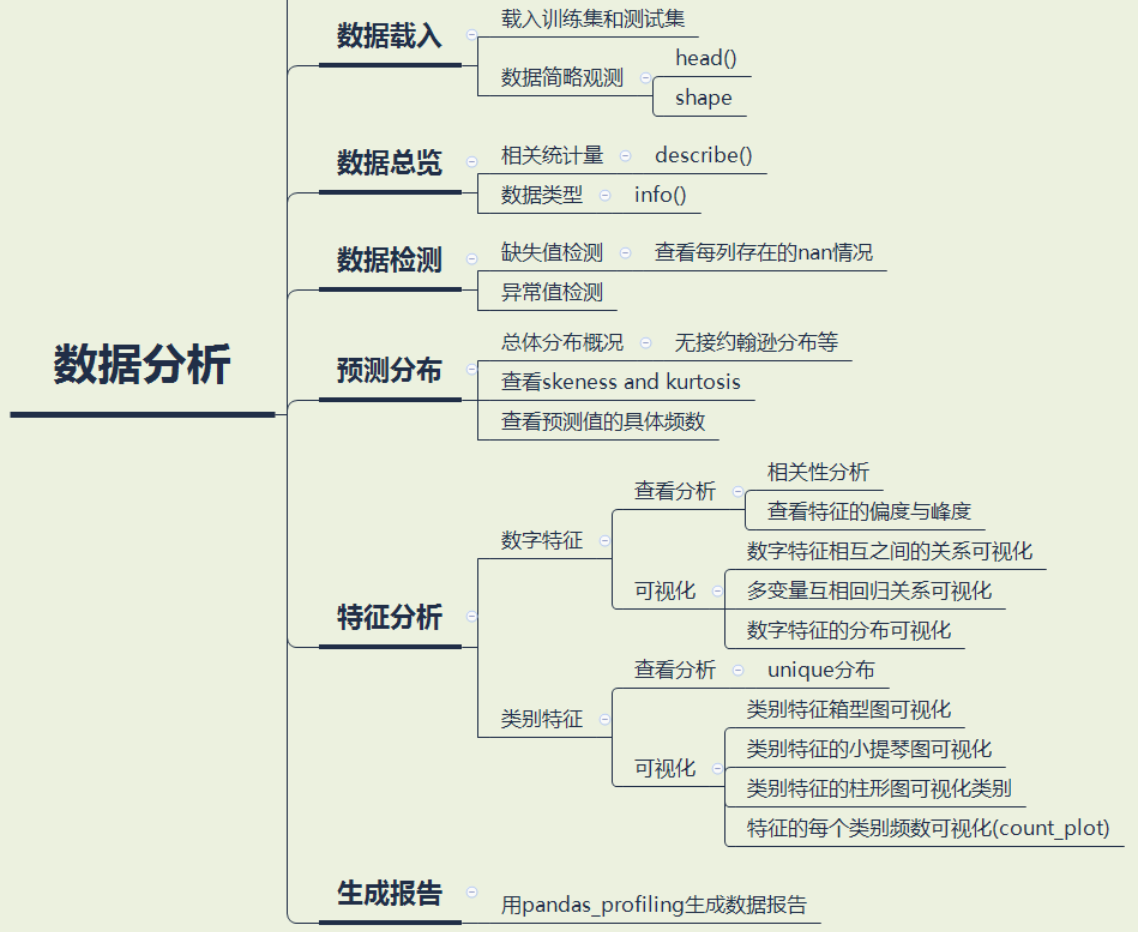

### 1. 导入必要的库

In [16]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 2. 计算特征与标签之间的相关性，展示热力图

- train_data.drop(['udmap'],axis = 1).corr() 获取关系矩阵
- 对关系矩阵取绝对值

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 620356 entries, 0 to 620355
Data columns (total 13 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   uuid       620356 non-null  int64 
 1   eid        620356 non-null  int64 
 2   udmap      620356 non-null  object
 3   common_ts  620356 non-null  int64 
 4   x1         620356 non-null  int64 
 5   x2         620356 non-null  int64 
 6   x3         620356 non-null  int64 
 7   x4         620356 non-null  int64 
 8   x5         620356 non-null  int64 
 9   x6         620356 non-null  int64 
 10  x7         620356 non-null  int64 
 11  x8         620356 non-null  int64 
 12  target     620356 non-null  int64 
dtypes: int64(12), object(1)
memory usage: 61.5+ MB
None


<Axes: >

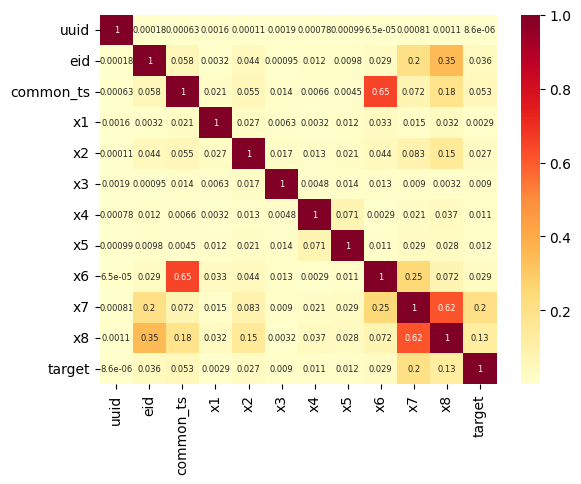

In [31]:
train_data = pd.read_csv('用户新增预测挑战赛公开数据/train.csv')
test_data = pd.read_csv('用户新增预测挑战赛公开数据/test.csv')
print(train_data.info())
sns.heatmap(train_data.drop(['udmap'],axis = 1).corr().abs(), annot=True,annot_kws={'size': 6}, cmap='YlOrRd')
# cmap：matplotlib 颜色条名称或者对象，或者是颜色列表，可选参数从数据值到颜色空间的映射

#### 结论1：
由上图可知target与x7的关系较为密切

### 3. 展示特征与标签分组统计图

<Axes: xlabel='x7', ylabel='target'>

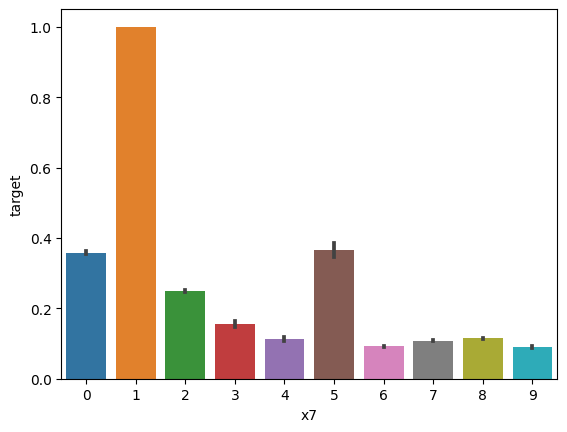

In [25]:
sns.barplot(x='x7', y = 'target', data = train_data)

#### 结论2：
由上图可知x7=1时target=1的可能性最大，即x=7时，用户为新增用户的可能性最大

#### 对结论进行验证

In [38]:
# 筛选出训练集中x7=1的所有行
filtered_df = train_data[train_data['x7'] == 1]
print(filtered_df)

          uuid  eid                          udmap      common_ts  x1  x2  x3  \
20368    20368   11                        unknown  1689566051736   4   2  41   
22608    22608   25  {"key3":"55722","key2":"484"}  1689065865974   4   2  41   
29382    29382   26  {"key3":"67804","key2":"484"}  1689566058892   4   2  41   
148901  148901   35                        unknown  1689566052692   4   2  41   
216018  216018   11                        unknown  1689566048419   4   2  41   
231686  231686   11                        unknown  1689566031274   4   2  41   
311718  311718   35                        unknown  1689566027316   4   2  41   
373878  373878   21                        unknown  1689065180927   4   2  41   
489588  489588   26  {"key3":"67804","key2":"484"}  1689065206995   4   2  41   
522414  522414   35                        unknown  1689065237218   4   2  41   
530550  530550   26  {"key3":"67804","key2":"650"}  1689065202671   4   2  41   
558285  558285   21         